# StackOverFlow Survey Salary Predection

### Team Members:
| Name  |
|---|
| **Hashem Bajabaa** 
| **Rayan Alshanba** 
| **Ziyad Alanzy**  

### Instructor: **Nourah Al-Mutlaq**

## Outlines:
#### Introduction
#### Inspiration
#### Tools

#### Challenges
#### About our dataset
#### EDA
#### Machine Learning Model

## Introduction

## Inspiration

## Tools

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf
from wordcloud import WordCloud
import warnings
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
cf.go_offline()

In [100]:
pd.set_option('display.max_columns', None)

In [101]:
df = pd.read_csv('Data/survey_results_public.csv', index_col='Respondent')
schema = pd.read_csv('Data/survey_results_schema.csv')

## Challenges

In [102]:
df.head()

MainBranch Hobbyist  \
Respondent                                                               
1                      I am a student who is learning to code      Yes   
2                      I am a student who is learning to code       No   
3           I am not primarily a developer, but I write co...      Yes   
4                              I am a developer by profession       No   
5                              I am a developer by profession      Yes   

                           OpenSourcer  \
Respondent                               
1                                Never   
2              Less than once per year   
3                                Never   
4                                Never   
5           Once a month or more often   

                                                   OpenSource  \
Respondent                                                      
1           The quality of OSS and closed source software ...   
2           The quality of OSS and closed source software ...   
3           The quality of OSS and closed source software ...   
4           The quality of OSS and closed source software ...   
5           OSS is, on average, of HIGHER quality than pro...   

                                        Employment                 Country  \
Respondent                                                                   
1           Not employed, and not looking for work          United Kingdom   
2               Not employed, but looking for work  Bosnia and Herzegovina   
3                               Employed full-time                Thailand   
4                               Employed full-time           United States   
5                               Employed full-time                 Ukraine   

                   Student                                            EdLevel  \
Respondent                                                                      
1                       No                          Primary/elementary school   
2           Yes, full-time  Secondary school (e.g. American high school, G...   
3                       No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4                       No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
5                       No           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                               UndergradMajor  \
Respondent                                                      
1                                                         NaN   
2                                                         NaN   
3                               Web development or web design   
4           Computer science, computer engineering, or sof...   
5           Computer science, computer engineering, or sof...   

                                                     EduOther  \
Respondent                                                      
1           Taught yourself a new language, framework, or ...   
2           Taken an online course in programming or softw...   
3           Taught yourself a new language, framework, or ...   
4           Taken an online course in programming or softw...   
5           Taken an online course in programming or softw...   

                             OrgSize  \
Respondent                             
1                                NaN   
2                                NaN   
3               100 to 499 employees   
4               100 to 499 employees   
5           10,000 or more employees   

                                                      DevType YearsCode  \
Respondent                                                                
1                                                         NaN         4   
2           Developer, desktop or enterprise applications;...       NaN   
3           Designer;Developer, back-end;Developer, front-...         3   
4                                       Developer, full-stack         3   
5           Academic re

In [103]:
df.tail()

MainBranch Hobbyist  \
Respondent                       
88377             NaN      Yes   
88601             NaN       No   
88802             NaN       No   
88816             NaN       No   
88863             NaN      Yes   

                                                  OpenSourcer  \
Respondent                                                      
88377       Less than once a month but more than once per ...   
88601                                                   Never   
88802                                                   Never   
88816                                                   Never   
88863                                 Less than once per year   

                                                   OpenSource  \
Respondent                                                      
88377       The quality of OSS and closed source software ...   
88601       The quality of OSS and closed source software ...   
88802                                                     NaN   
88816       OSS is, on average, of HIGHER quality than pro...   
88863       OSS is, on average, of HIGHER quality than pro...   

                                                   Employment Country  \
Respondent                                                              
88377                  Not employed, and not looking for work  Canada   
88601                                                     NaN     NaN   
88802                                      Employed full-time     NaN   
88816       Independent contractor, freelancer, or self-em...     NaN   
88863                  Not employed, and not looking for work   Spain   

                   Student                             EdLevel  \
Respondent                                                       
88377                   No           Primary/elementary school   
88601                  NaN                                 NaN   
88802                  NaN                                 NaN   
88816                  NaN                                 NaN   
88863       Yes, full-time  Professional degree (JD, MD, etc.)   

                                               UndergradMajor  \
Respondent                                                      
88377                                                     NaN   
88601                                                     NaN   
88802                                                     NaN   
88816                                                     NaN   
88863       Computer science, computer engineering, or sof...   

                                                     EduOther OrgSize DevType  \
Respondent                                                                      
88377       Taught yourself a new language, framework, or ...     NaN     NaN   
88601                                                     NaN     NaN     NaN   
88802                                                     NaN     NaN     NaN   
88816                                                     NaN     NaN     NaN   
88863       Taken an online course in programming or softw...     NaN     NaN   

           YearsCode Age1stCode YearsCodePro CareerSat JobSat MgrIdiot  \
Respondent                                                               
88377            NaN        NaN          NaN       NaN    NaN      NaN   
88601            NaN        NaN          NaN       NaN    NaN      NaN   
88802            NaN        NaN          NaN       NaN    NaN      NaN   
88816            NaN        NaN          NaN       NaN    NaN      NaN   
88863              8         11            3       NaN    NaN      NaN   

           MgrMoney MgrWant JobSeek LastHireDate LastInt FizzBuzz JobFactors  \
Respondent                                                                     
88377           NaN     NaN     NaN          NaN     NaN      NaN        NaN   
88601           NaN     NaN     NaN          NaN     NaN      NaN        NaN   
88802           NaN   

In [104]:
df.shape

(88883, 84)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null

## About our dataset

In [106]:
with pd.option_context('display.max_rows', None,):
    print(schema)


                    Column                                       QuestionText
0               Respondent  Randomized respondent ID number (not in order ...
1               MainBranch  Which of the following options best describes ...
2                 Hobbyist                            Do you code as a hobby?
3              OpenSourcer        How often do you contribute to open source?
4               OpenSource  How do you feel about the quality of open sour...
5               Employment  Which of the following best describes your cur...
6                  Country          In which country do you currently reside?
7                  Student  Are you currently enrolled in a formal, degree...
8                  EdLevel  Which of the following best describes the high...
9           UndergradMajor  What was your main or most important field of ...
10                EduOther  Which of the following types of non-degree edu...
11                 OrgSize  Approximately how many people are em

- here we notice schema  has 84 rows which == to our df columns
- also ConvertedComp which we'll use for reg represent the salary per year in USD and CompFreq means per month/week/year

## Data Assessment and Cleaning

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null

- We have 84 columns and 88863 rows 
- All columns are in data type we want except for Age needed to be convert to Int
- Some null values 

In [108]:
df.isnull().sum()

MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
Employment       1702
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 84, dtype: int64

In [109]:
df['ConvertedComp'].isnull().sum()

33060

- This columns represent the Salary is important for our model we need to fill the null values

In [110]:
df.describe()

CompTotal  ConvertedComp   WorkWeekHrs    CodeRevHrs           Age
count  5.594500e+04   5.582300e+04  64503.000000  49790.000000  79210.000000
mean   5.519014e+11   1.271107e+05     42.127197      5.084308     30.336699
std    7.331926e+13   2.841523e+05     37.287610      5.513931      9.178390
min    0.000000e+00   0.000000e+00      1.000000      0.000000      1.000000
25%    2.000000e+04   2.577750e+04     40.000000      2.000000     24.000000
50%    6.200000e+04   5.728700e+04     40.000000      4.000000     29.000000
75%    1.200000e+05   1.000000e+05     44.750000      6.000000     35.000000
max    1.000000e+16   2.000000e+06   4850.000000     99.000000     99.000000

In [111]:
df.describe(include='object')

MainBranch Hobbyist OpenSourcer  \
count                            88331    88883       88883   
unique                               5        2           4   
top     I am a developer by profession      Yes       Never   
freq                             65679    71257       32295   

                                               OpenSource          Employment  \
count                                               86842               87181   
unique                                                  3                   6   
top     The quality of OSS and closed source software ...  Employed full-time   
freq                                                41527               64440   

              Country Student                                   EdLevel  \
count           88751   87014                                     86390   
unique            179       3                                         9   
top     United States      No  Bachelor’s degree (BA, BS, B.Eng., etc.)   
freq            20949   65816                                     39134   

                                           UndergradMajor  \
count                                               75614   
unique                                                 12   
top     Computer science, computer engineering, or sof...   
freq                                                47214   

                                                 EduOther             OrgSize  \
count                                               84260               71791   
unique                                                492                   9   
top     Taught yourself a new language, framework, or ...  20 to 99 employees   
freq                                                 6699               15199   

                      DevType YearsCode Age1stCode YearsCodePro  \
count                   81335     87938      87634        74331   
unique                  13141        52         69           52   
top     Developer, full-stack         5         15            2   
freq                     8433      7047       8681         7959   

             CareerSat              JobSat            MgrIdiot MgrMoney  \
count            72847               70988               61159    61157   
unique               5                   5                   4        3   
top     Very satisfied  Slightly satisfied  Somewhat confident       No   
freq             29173               24207               25207    31346   

         MgrWant                                            JobSeek  \
count      61232                                              80555   
unique         4                                                  3   
top     Not sure  I’m not actively looking, but I am open to new...   
freq       22276                                              47260   

                LastHireDate  \
count                  79854   
unique                     6   
top     Less than a year ago   
freq                   25844   

                                                  LastInt FizzBuzz  \
count                                               67155    71344   
unique                                                 63        2   
top     Interview with people in peer roles;Interview ...       No   
freq                                                12383    60873   

                                               JobFactors  \
count                                               79371   
unique                                                175   
top     Languages, frameworks, and other technologies ...   
freq                                                 4992   

                            ResumeUpdate CurrencySymbol          CurrencyDesc  \
count                              77877          71392                 71392   
unique                                 6            143                   144   
top     I was preparing for a job search            USD  United States dollar   
freq    

In [112]:
df['ConvertedComp'].describe()

count    5.582300e+04
mean     1.271107e+05
std      2.841523e+05
min      0.000000e+00
25%      2.577750e+04
50%      5.728700e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

<AxesSubplot:>

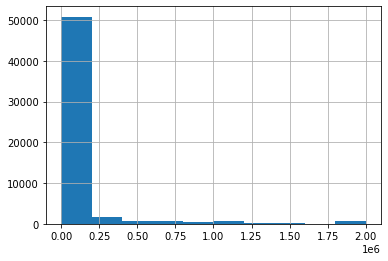

In [113]:
df['ConvertedComp'].hist()

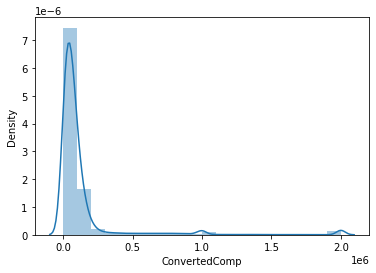

In [114]:
sns.distplot(df['ConvertedComp'], bins=20);

- Here we decide to fill the null values with the mean of our Salary

In [115]:
Salary_mean = df['ConvertedComp'].mean()
df['ConvertedComp'].fillna(Salary_mean)

Respondent
1        127110.738423
2        127110.738423
3          8820.000000
4         61000.000000
5        127110.738423
             ...      
88377    127110.738423
88601    127110.738423
88802    127110.738423
88816    127110.738423
88863    127110.738423
Name: ConvertedComp, Length: 88883, dtype: float64

- here we will drop the unnecessary columns

In [116]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [117]:
df.drop(columns={'Trans', 'Sexuality','SurveyLength', 'SurveyEase', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'WebFrameDesireNextYear', 'MgrIdiot',
'MgrMoney',
'MgrWant',
'JobSeek',
'LastHireDate',
'LastInt',
'ResumeUpdate',   
'FizzBuzz',
'JobFactors',
'WorkPlan',
'WorkChallenge',
'WorkRemote',
'WorkLoc',
'ImpSyn',
'CodeRev',
'CodeRevHrs',
'UnitTests',
'PurchaseHow',
'PurchaseWhat',
'LanguageDesireNextYear',
'DatabaseWorkedWith',
'DatabaseDesireNextYear',
'PlatformWorkedWith',
'PlatformDesireNextYear',
'WebFrameWorkedWith',
'WebFrameDesireNextYear',
'MiscTechWorkedWith',
'MiscTechDesireNextYear',
'Containers',
'BlockchainOrg',
'BlockchainIs',
'BetterLife',
'OffOn',
'Extraversion',
'ScreenName',
'SOVisit1st',
'SOVisitFreq',
'SOVisitTo',
'SOFindAnswer',
'SOTimeSaved',
'SOHowMuchTime',
'SOAccount',
'SOPartFreq',
'SOJobs',
'EntTeams',
'SOComm',
'WelcomeChange',
'SONewContent',
'Trans',
'Sexuality',
'Ethnicity',
'Dependents',
'SurveyLength',
'SurveyEase'}, inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MainBranch          88331 non-null  object 
 1   Hobbyist            88883 non-null  object 
 2   OpenSourcer         88883 non-null  object 
 3   OpenSource          86842 non-null  object 
 4   Employment          87181 non-null  object 
 5   Country             88751 non-null  object 
 6   Student             87014 non-null  object 
 7   EdLevel             86390 non-null  object 
 8   UndergradMajor      75614 non-null  object 
 9   EduOther            84260 non-null  object 
 10  OrgSize             71791 non-null  object 
 11  DevType             81335 non-null  object 
 12  YearsCode           87938 non-null  object 
 13  Age1stCode          87634 non-null  object 
 14  YearsCodePro        74331 non-null  object 
 15  CareerSat           72847 non-null  object 
 16  JobS

In [119]:
for row in df:
    print(row," ",df[row].isnull().sum())

MainBranch   552
Hobbyist   0
OpenSourcer   0
OpenSource   2041
Employment   1702
Country   132
Student   1869
EdLevel   2493
UndergradMajor   13269
EduOther   4623
OrgSize   17092
DevType   7548
YearsCode   945
Age1stCode   1249
YearsCodePro   14552
CareerSat   16036
JobSat   17895
CurrencySymbol   17491
CurrencyDesc   17491
CompTotal   32938
CompFreq   25615
ConvertedComp   33060
WorkWeekHrs   24380
LanguageWorkedWith   1314
DevEnviron   1566
OpSys   1032
ITperson   1742
SocialMedia   4446
Age   9673
Gender   3477


In [120]:
df['Employment'].fillna('Employed full-time', inplace=True)
df['YearsCode'].fillna('5',inplace=True)
df['Gender'].fillna('Woman',inplace=True)
df['OpSys'].fillna('Windows',inplace=True)
df['DevEnviron'].fillna('Visual Studio Code',inplace=True)
df['LanguageWorkedWith'].fillna('HTML/CSS;JavaScript;PHP;SQL',inplace=True)
df['Age1stCode'].fillna('15',inplace=True)
df['OpenSource'].fillna('The quality of OSS and closed source software is about the same',inplace=True)
df['Country'].fillna('Saudi Arabia',inplace=True)
df['Student'].fillna('No',inplace=True)
df['EdLevel'].fillna('Bachelor’s degree (BA, BS, B.Eng., etc.)',inplace=True)
df['MainBranch'].fillna('I am a developer by profession',inplace=True)

In [121]:
for col in df:
    print(col," ",df[col].isnull().sum())

MainBranch   0
Hobbyist   0
OpenSourcer   0
OpenSource   0
Employment   0
Country   0
Student   0
EdLevel   0
UndergradMajor   13269
EduOther   4623
OrgSize   17092
DevType   7548
YearsCode   0
Age1stCode   0
YearsCodePro   14552
CareerSat   16036
JobSat   17895
CurrencySymbol   17491
CurrencyDesc   17491
CompTotal   32938
CompFreq   25615
ConvertedComp   33060
WorkWeekHrs   24380
LanguageWorkedWith   0
DevEnviron   0
OpSys   0
ITperson   1742
SocialMedia   4446
Age   9673
Gender   0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MainBranch          88883 non-null  object 
 1   Hobbyist            88883 non-null  object 
 2   OpenSourcer         88883 non-null  object 
 3   OpenSource          88883 non-null  object 
 4   Employment          88883 non-null  object 
 5   Country             88883 non-null  object 
 6   Student             88883 non-null  object 
 7   EdLevel             88883 non-null  object 
 8   UndergradMajor      75614 non-null  object 
 9   EduOther            84260 non-null  object 
 10  OrgSize             71791 non-null  object 
 11  DevType             81335 non-null  object 
 12  YearsCode           88883 non-null  object 
 13  Age1stCode          88883 non-null  object 
 14  YearsCodePro        74331 non-null  object 
 15  CareerSat           72847 non-null  object 
 16  JobS

In [123]:
df.dropna(axis=0, inplace=True)

In [124]:
for col in df:
    print(col," ",df[col].isnull().sum())

MainBranch   0
Hobbyist   0
OpenSourcer   0
OpenSource   0
Employment   0
Country   0
Student   0
EdLevel   0
UndergradMajor   0
EduOther   0
OrgSize   0
DevType   0
YearsCode   0
Age1stCode   0
YearsCodePro   0
CareerSat   0
JobSat   0
CurrencySymbol   0
CurrencyDesc   0
CompTotal   0
CompFreq   0
ConvertedComp   0
WorkWeekHrs   0
LanguageWorkedWith   0
DevEnviron   0
OpSys   0
ITperson   0
SocialMedia   0
Age   0
Gender   0


In [125]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   40168
I am not primarily a developer, but I write code sometimes as part of my work     3813
Name: MainBranch, dtype: int64

In [126]:
main_branch = []
for row in df['MainBranch']:
    if row == 'I am a developer by profession':
        main_branch.append('Developer')
        
        
    elif row == 'I am a student who is learning to code':
        main_branch.append('Student')
    elif row == 'I am not primarily a developer, but I write code sometimes as part of my work':
        main_branch.append('Semi_Developer')
    elif row == "I code primarily as a hobby":
        main_branch.append('Hobby')
    elif row == 'I used to be a developer by profession, but no longer am':
        main_branch.append('Ex_Developer')
    else:
        main_branch.append('Student')
df['MainBranch'] = main_branch


In [127]:
df['OpenSourcer'].value_counts()

Never                                                 15147
Less than once per year                               13251
Less than once a month but more than once per year    10782
Once a month or more often                             4801
Name: OpenSourcer, dtype: int64

In [128]:
open_sourcer = []
for row in df['OpenSourcer']:
    if row == 'Never' or row == 'Less than once per year' or row =='':
        open_sourcer.append('No')
    else:
        open_sourcer.append('Yes')
df['OpenSourcer'] = open_sourcer

In [129]:
df['OpenSourcer'].value_counts()

No     28398
Yes    15583
Name: OpenSourcer, dtype: int64

In [130]:
df['CareerSat'].value_counts()

Very satisfied                        18686
Slightly satisfied                    15399
Slightly dissatisfied                  4370
Neither satisfied nor dissatisfied     3546
Very dissatisfied                      1980
Name: CareerSat, dtype: int64

In [131]:
df['OpSys'].value_counts()

Windows        19660
MacOS          13825
Linux-based    10464
BSD               32
Name: OpSys, dtype: int64

- Next we will convert Age to Integer type as age is always a whole number.

In [132]:
df['Age'].value_counts()

28.0    2894
25.0    2879
27.0    2869
26.0    2797
30.0    2711
        ... 
22.5       1
43.5       1
24.5       1
75.0       1
95.0       1
Name: Age, Length: 80, dtype: int64

In [133]:
df['Age'] = df['Age'].fillna(0)

In [134]:
age = []
for row in df['Age']:
    try:
        age.append(int(row))
    except:
        age.append(row)
df['Age'] = age
df['Age'].dtype

dtype('int64')

In [135]:
df['Gender'].value_counts()

Man                                                            40155
Woman                                                           3392
Non-binary, genderqueer, or gender non-conforming                233
Man;Non-binary, genderqueer, or gender non-conforming             91
Woman;Non-binary, genderqueer, or gender non-conforming           71
Woman;Man                                                         28
Woman;Man;Non-binary, genderqueer, or gender non-conforming       11
Name: Gender, dtype: int64

In [136]:
Gender = []
for i in df['Gender']:
    if (i=='Man') or (i== 'Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Male')
    elif (i=='Woman') or (i=='Woman;Non-binary, genderqueer, or gender non-conforming') or (i=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Female')
    else:
        Gender.append('Others')
df['Gender'] = Gender

In [137]:
df['Gender'].value_counts()

Male      40246
Female     3474
Others      261
Name: Gender, dtype: int64

In [138]:
df['Country'].value_counts()

United States     12244
United Kingdom     3267
India              3136
Germany            2717
Canada             1837
                  ...  
Lesotho               1
Guinea                1
Angola                1
Togo                  1
Mali                  1
Name: Country, Length: 157, dtype: int64

In [139]:
df['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                  23512
Master’s degree (MA, MS, M.Eng., MBA, etc.)               11428
Some college/university study without earning a degree     5517
Associate degree                                           1561
Other doctoral degree (Ph.D, Ed.D., etc.)                  1360
Professional degree (JD, MD, etc.)                          603
Name: EdLevel, dtype: int64

In [140]:
EdLevel = []
for row in df['EdLevel']:
    if row == 'Bachelor’s degree (BA, BS, B.Eng., etc.)':
        EdLevel.append('Bachelor')
    elif row == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        EdLevel.append('Master')
    elif row == 'Other doctoral degree (Ph.D, Ed.D., etc.)' or row == 'Associate degree':
        EdLevel.append('Phd')
    else:
        EdLevel.append('Lower')
df['EdLevel'] = EdLevel
df['EdLevel'].value_counts()

Bachelor    23512
Master      11428
Lower        6120
Phd          2921
Name: EdLevel, dtype: int64

In [141]:
df['JobSat'].value_counts()

Slightly satisfied                    15285
Very satisfied                        14244
Slightly dissatisfied                  6743
Neither satisfied nor dissatisfied     4768
Very dissatisfied                      2941
Name: JobSat, dtype: int64

In [142]:
JobSat = []
for row in df['JobSat']:
    if row == 'Slightly satisfied':
        JobSat.append('Satisfied')
    elif row == 'Very satisfied':
        JobSat.append('Satisfied')
    elif row == 'Slightly dissatisfied':
        JobSat.append('Dissatisfied')
    elif row == 'Very dissatisfied':
        JobSat.append('Dissatisfied')
    else:
        JobSat.append('Other')
   
        
df['JobSat'] = JobSat
df['JobSat'].value_counts()

Satisfied       29529
Dissatisfied     9684
Other            4768
Name: JobSat, dtype: int64

In [143]:
df['Employment'].value_counts()

Employed full-time                                      39251
Independent contractor, freelancer, or self-employed     3417
Employed part-time                                       1313
Name: Employment, dtype: int64

In [144]:
Employ = []
for row in df['Employment']:
    if row == 'Employed full-time':
        Employ.append('Full-time')
    elif row == 'Independent contractor, freelancer, or self-employed':
        Employ.append('Freelancer')
    elif row == 'Not employed, but looking for work' or row == 'Not employed, and not looking for work':
        Employ.append('Not employed')
    elif row == 'Employed part-time':
        Employ.append('Part-time')
    elif row == 'Retired':
        Employ.append('Retired')
    else:
        Employ.append('Other')
        
df['Employment'] = Employ
df['Employment'].value_counts()

Full-time     39251
Freelancer     3417
Part-time      1313
Name: Employment, dtype: int64

## EDA

## Data Scientist

In [145]:
sum(df['DevType'] == 'Data scientist or machine learning specialist')

329

In [217]:
filt = df['DevType'] == 'Data scientist or machine learning specialist'
scientist = df.loc[filt, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]
plt.figure(figsize=(10, 4));
px.bar(scientist, x="EdLevel", y='ConvertedComp', title='Data Scientist Education Level with Salary')

<Figure size 720x288 with 0 Axes>

In [147]:

px.bar(scientist, x='Country', y='Age', title='Data Scientist Countries vs Age')

In [148]:
px.bar(scientist, x='Employment', y='ConvertedComp', title='Data Scientist Employment  with Salary')

In [149]:
px.bar(scientist, x='Gender', y='ConvertedComp', title='Data Scientist Gender vs Salary')

## Python

In [150]:
filt = df['LanguageWorkedWith'].str.contains('Python')

python_dev = df.loc[filt, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]
python_dev


Country                                         DevEnviron  \
Respondent                                                                     
4           United States       Eclipse;Vim;Visual Studio;Visual Studio Code   
9             New Zealand                                                Vim   
20              Lithuania    Android Studio;Visual Studio;Visual Studio Code   
23          United States                                 Visual Studio Code   
26          United States     Notepad++;Sublime Text;Vim;Visual Studio;Xcode   
...                   ...                                                ...   
88867            Portugal                                   PHPStorm;PyCharm   
88871              Poland      IntelliJ;Notepad++;PyCharm;Visual Studio Code   
88873              Canada  IPython / Jupyter;RStudio;TextMate;Vim;Visual ...   
88874       United States         IPython / Jupyter;PyCharm;Sublime Text;Vim   
88876       United States  IntelliJ;Notepad++;PyCharm;Sublime Text;Vim;Vi...   

                                           LanguageWorkedWith  Age  \
Respondent                                                           
4                                         C;C++;C#;Python;SQL   22   
9           Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...   23   
20          Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...   38   
23          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...   22   
26          Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...   34   
...                                                       ...  ...   
88867                 Bash/Shell/PowerShell;JavaScript;Python   29   
88871       C++;C#;HTML/CSS;Java;JavaScript;Python;SQL;Typ...   22   
88873                    HTML/CSS;JavaScript;PHP;Python;R;SQL   37   
88874                                    C++;Python;Scala;SQL   26   
88876       Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...   23   

            ConvertedComp   EdLevel  Employment Gender  
Respondent                                              
4                 61000.0  Bachelor   Full-time   Male  
9                 95179.0     Lower   Full-time   Male  
20                41244.0    Master   Full-time   Male  
23                69000.0  Bachelor   Full-time   Male  
26               114000.0     Lower   Full-time   Male  
...                   ...       ...         ...    ...  
88867            412464.0    Master   Full-time   Male  
88871             16032.0  Bachelor   Full-time   Male  
88873             72522.0     Lower  Freelancer   Male  
88874           2000000.0  Bachelor   Full-time   Male  
88876            180000.0  Bachelor   Full-time   Male  

[17500 rows x 8 columns]

In [184]:
px.bar(python_dev, x='Gender', y='ConvertedComp', title='Python Dev Gender vs Salary', color='Gender')

In [152]:
px.bar(python_dev, x='Employment', y='ConvertedComp', title='Python Dev Employment vs Salary', color='Employment')

In [153]:
px.bar(python_dev,x='Country', y='Age', title='Python Dev Country vs Age', color='Country')

In [154]:
px.bar(python_dev, x="EdLevel", y='ConvertedComp', title='Python Dev Education vs Salary', color='EdLevel')

In [155]:
vs = df['DevEnviron'].str.contains('Visual Studio')
ju = df['DevEnviron'].str.contains('Jupyter')
at = df['DevEnviron'].str.contains('Atom')
vm = df['DevEnviron'].str.contains('Vim')

In [156]:

vs_df = df.loc[vs, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]
ju_df = df.loc[ju, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]
at_df = df.loc[at, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]
vm_df = df.loc[vm, ['Country','DevEnviron', 'LanguageWorkedWith', 'Age', 'ConvertedComp', 'EdLevel', 'Employment', 'Gender' ]]



In [157]:
dev_env = pd.concat([vs_df, ju_df,at_df,  vm_df])


dev_env['vs'] = vs
dev_env['ju'] = ju
dev_env['at'] = at
dev_env['vm'] = vm
dev_env

Country                                         DevEnviron  \
Respondent                                                                     
3                Thailand                             Vim;Visual Studio Code   
4           United States       Eclipse;Vim;Visual Studio;Visual Studio Code   
13          United States         Vim;Visual Studio;Visual Studio Code;Xcode   
14                Germany                                      Visual Studio   
17              Australia                        IntelliJ;Visual Studio Code   
...                   ...                                                ...   
88834       United States                                                Vim   
88873              Canada  IPython / Jupyter;RStudio;TextMate;Vim;Visual ...   
88874       United States         IPython / Jupyter;PyCharm;Sublime Text;Vim   
88876       United States  IntelliJ;Notepad++;PyCharm;Sublime Text;Vim;Vi...   
88877       United States  Atom;Emacs;IntelliJ;IPython / Jupyter;PyCharm;...   

                                           LanguageWorkedWith  Age  \
Respondent                                                           
3                                                    HTML/CSS   28   
4                                         C;C++;C#;Python;SQL   22   
13          Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...   28   
14                                                        C++   31   
17          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...   29   
...                                                       ...  ...   
88834                                            C;Python;SQL   43   
88873                    HTML/CSS;JavaScript;PHP;Python;R;SQL   37   
88874                                    C++;Python;Scala;SQL   26   
88876       Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...   23   
88877       Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...   48   

            ConvertedComp   EdLevel  Employment Gender     vs     ju     at  \
Respondent                                                                    
3                  8820.0  Bachelor   Full-time   Male   True  False  False   
4                 61000.0  Bachelor   Full-time   Male   True  False  False   
13                90000.0    Master   Full-time   Male   True  False  False   
14                57060.0       Phd   Full-time   Male   True  False  False   
17                65277.0  Bachelor   Full-time   Male   True  False  False   
...                   ...       ...         ...    ...    ...    ...    ...   
88834            120000.0    Master   Full-time   Male  False  False  False   
88873             72522.0     Lower  Freelancer   Male   True   True  False   
88874           2000000.0  Bachelor   Full-time   Male  False   True  False   
88876            180000.0  Bachelor   Full-time   Male   True  False  False   
88877           2000000.0  Bachelor   Full-time   Male  False   True   True   

               vm  
Respondent         
3            True  
4            True  
13           True  
14          False  
17          False  
...           ...  
88834        True  
88873        True  
88874        True  
88876        True  
88877        True  

[49160 rows x 12 columns]

## Jupyter Users

In [158]:
px.bar(dev_env, x="Gender", y='Age', title='Jupyter Enviroment Gender vs Age', color='ju')

In [159]:
df['Country'].value_counts().count()

157

- here we have 157 country

In [160]:
filt = df['Country'] == 'Saudi Arabia'
df.loc[filt]['Country'].count()

40

- here we have 40 people from saudi 

In [161]:
x=df.groupby('Country').mean()
x

CompTotal  ConvertedComp  \
Country                                                             
Afghanistan                           1.950000e+05   31122.857143   
Albania                               2.007810e+05   24108.219512   
Algeria                               9.723667e+04   50846.000000   
Angola                                2.020000e+05    7764.000000   
Argentina                             1.852624e+05   31281.275410   
...                                            ...            ...   
Venezuela, Bolivarian Republic of...  1.117737e+05   16234.058824   
Viet Nam                              2.400950e+07   16148.016393   
Yemen                                 1.375000e+05   16909.166667   
Zambia                                3.578333e+04   12215.833333   
Zimbabwe                              9.385417e+03   34708.333333   

                                      WorkWeekHrs        Age  
Country                                                       
Afghanistan                             42.000000  26.285714  
Albania                                 39.951220  26.658537  
Algeria                                 37.611111  31.037037  
Angola                                  45.000000  22.000000  
Argentina                               36.924590  31.859016  
...                                           ...        ...  
Venezuela, Bolivarian Republic of...    42.205882  28.941176  
Viet Nam                                42.524590  27.803279  
Yemen                                   38.666667  29.500000  
Zambia                                  50.833333  27.166667  
Zimbabwe                                50.250000  29.916667  

[157 rows x 4 columns]

##  Countries

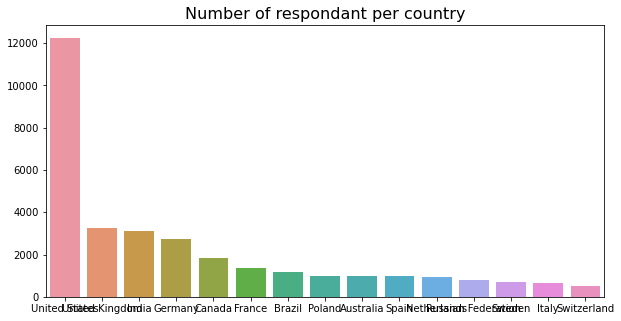

In [209]:
plt.figure(figsize=(10, 5))
column_count = df['Country'].value_counts()[:15] 
sns.barplot(x=column_count.index, y=column_count.values)
plt.title('Number of respondant per country', fontsize=16);

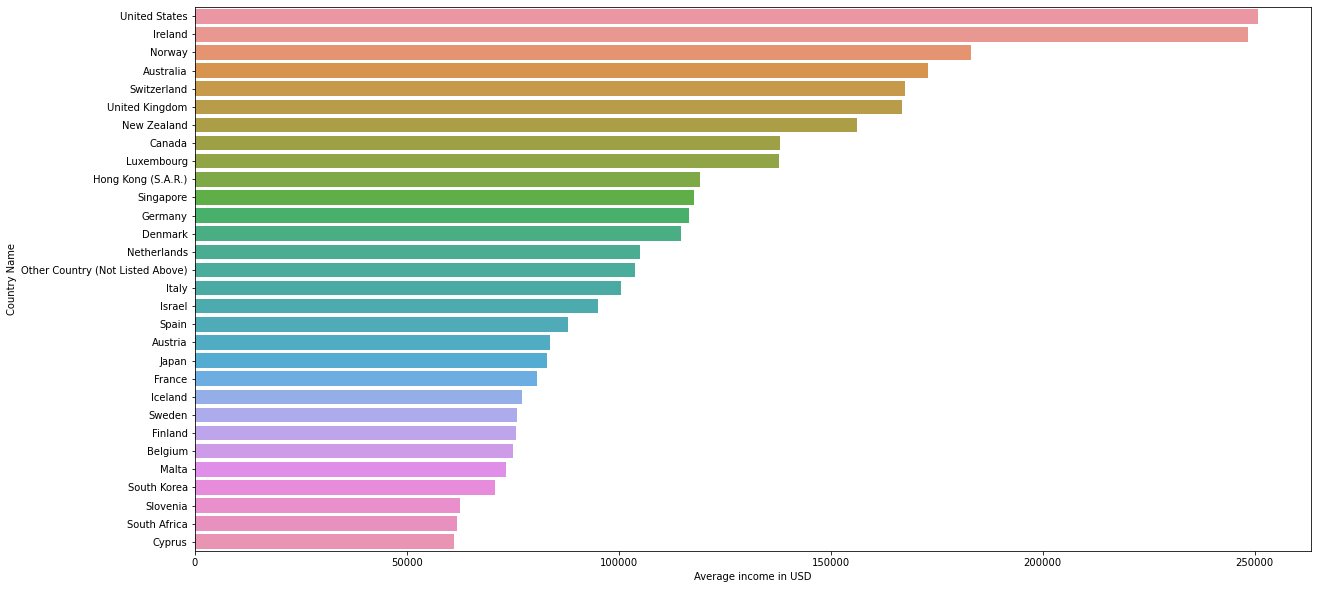

In [163]:
plt.figure(figsize=(20, 10))
num = df['Country'].value_counts()[:100]
total = df.groupby('Country')['ConvertedComp'].sum()
data_plot1 = (total/num).sort_values(ascending=False)[:30]
data_plot = data_plot1.reset_index()
data_plot.rename(columns={0:'Average income in USD','index':'Country Name'},inplace=True)
sns.barplot(y='Country Name',x='Average income in USD',data = data_plot);

### Respondant code for hobby

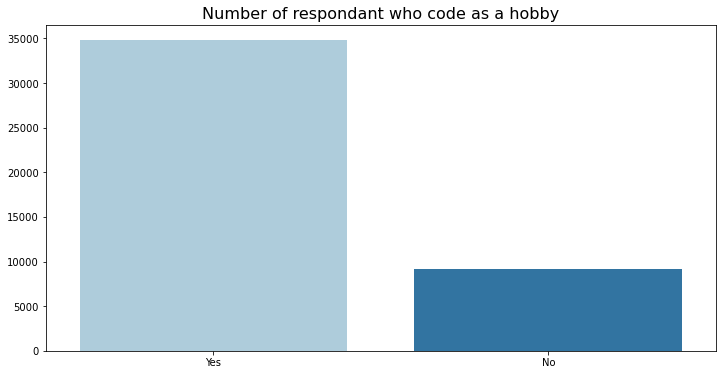

In [164]:
plt.figure(figsize=(12, 6))
column_count = df['Hobbyist'].value_counts() 
sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
plt.title('Number of respondant who code as a hobby', fontsize=16);

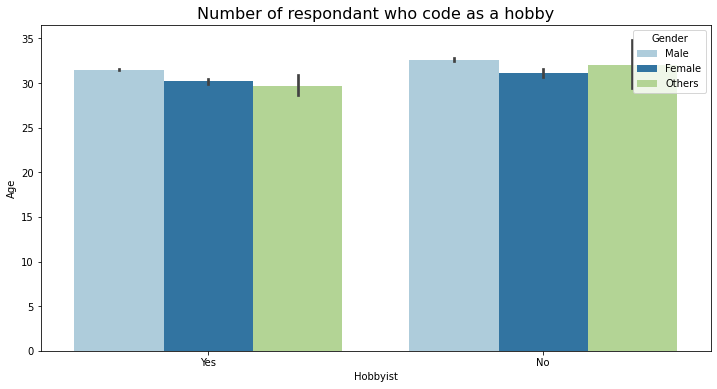

In [165]:
plt.figure(figsize=(12, 6))
column_count = df['Hobbyist'].value_counts() 
sns.barplot(data=df, x="Hobbyist", y="Age", palette='Paired', hue='Gender')
plt.title('Number of respondant who code as a hobby', fontsize=16);

### Respondant code for OpenSource

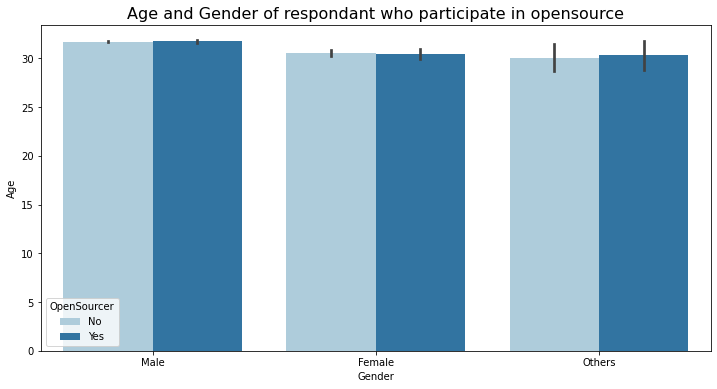

In [166]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Gender", y="Age", palette='Paired', hue='OpenSourcer')
plt.title('Age and Gender of respondant who participate in opensource', fontsize=16);

<AxesSubplot:xlabel='MainBranch', ylabel='Number_of_Developers'>

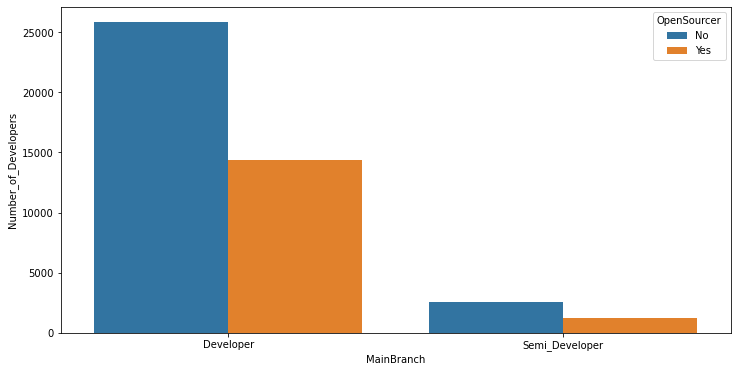

In [167]:
plt.figure(figsize=(12, 6))
dev = df.groupby('MainBranch')['OpenSourcer'].value_counts()
dev = dev.to_frame('Number_of_Developers')
dev = dev.reset_index()
sns.barplot(x='MainBranch',y='Number_of_Developers',hue='OpenSourcer',data=dev)

- Does coding as a hobby affect contributing to Open Source ?

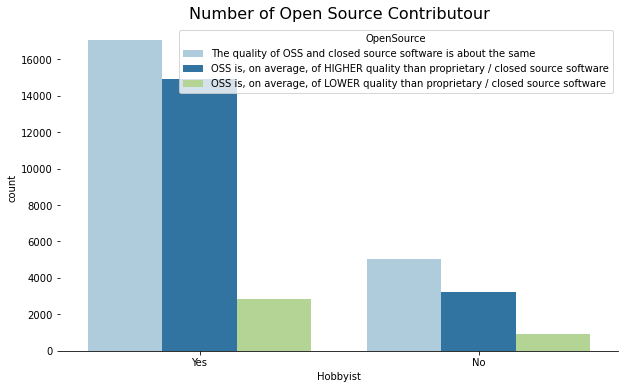

In [188]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(df['Hobbyist'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16);

### Students

- Student or Not ?

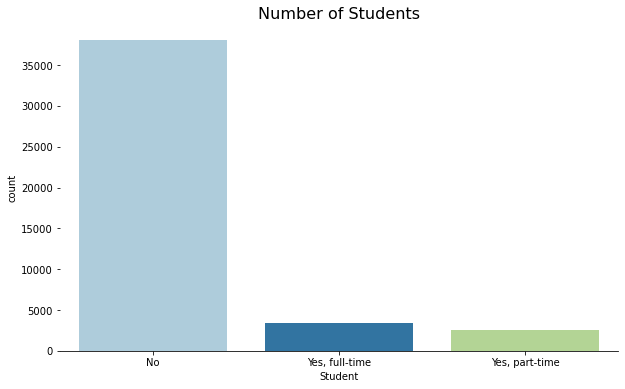

In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Student'], palette='Paired')
sns.despine(left=True)
plt.title('Number of Students', fontsize=16);

### Employement Status

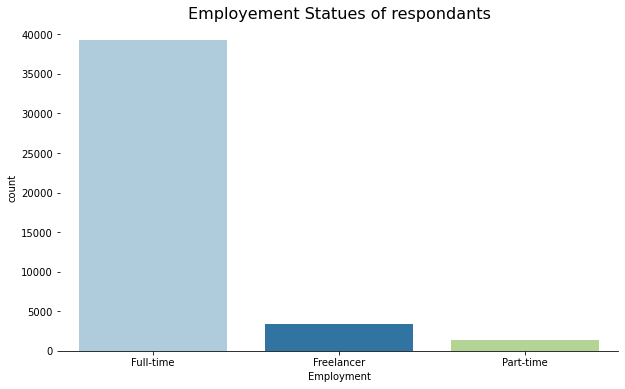

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Employment'], palette='Paired')
sns.despine(left=True)
plt.title('Employement Statues of respondants', fontsize=16);

### Intresting Insight

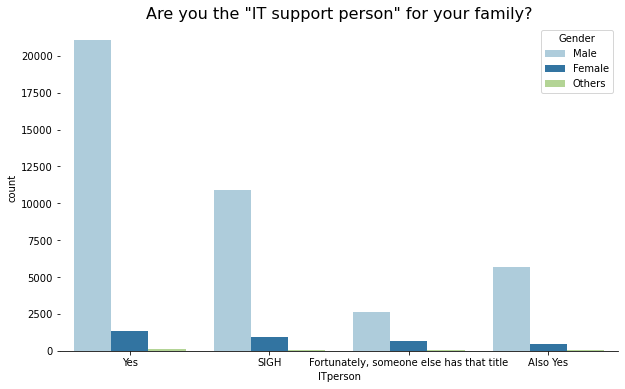

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='ITperson', palette='Paired', hue='Gender')
sns.despine(left=True)
plt.title('Are you the "IT support person" for your family?', fontsize=16);


### Respondents Degrees

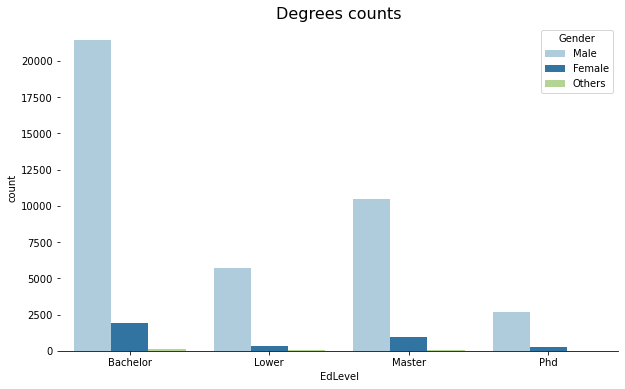

In [198]:
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='EdLevel', palette='Paired', hue='Gender')
sns.despine(left=True)
plt.title('Degrees counts', fontsize=16);
# plt.xticks(rotation='vertical');

### JobSatisfaction

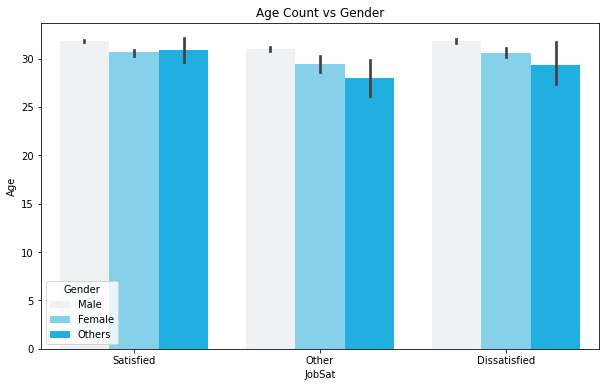

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(x="JobSat", y = "Age", hue='Gender', data=df, color='deepskyblue').set_title("Age Count vs Gender");



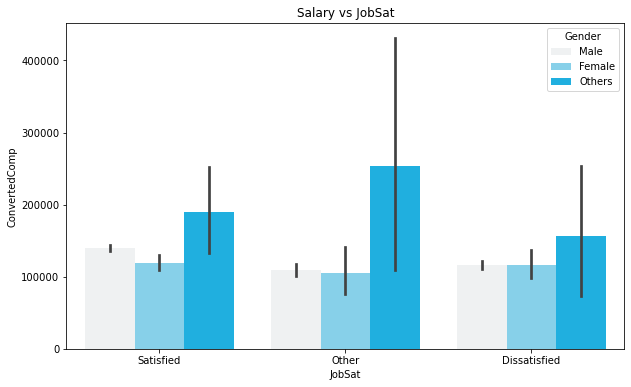

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x="JobSat", y = "ConvertedComp", hue='Gender', data=df, color='deepskyblue').set_title("Salary vs JobSat");


### Salary

In [218]:
px.line(df, x="ConvertedComp", y="Age", title=' Salary and Age')

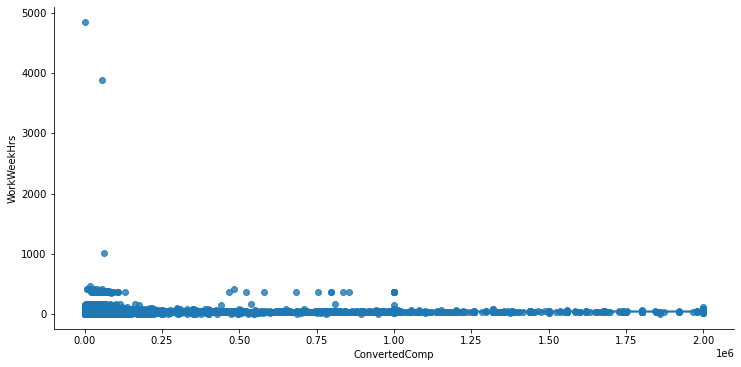

In [177]:
sns.lmplot(x = "ConvertedComp", y ="WorkWeekHrs" , data = df, height = 5.2, aspect = 2);

### Correlations

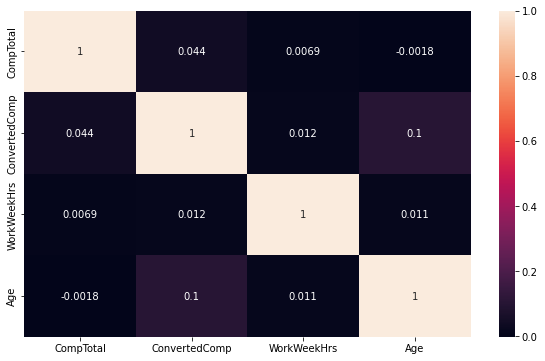

In [197]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True);

In [57]:
df.corr()

CompTotal  ConvertedComp  WorkWeekHrs       Age
CompTotal       1.000000       0.043772     0.006853 -0.001796
ConvertedComp   0.043772       1.000000     0.011978  0.101981
WorkWeekHrs     0.006853       0.011978     1.000000  0.010869
Age            -0.001796       0.101981     0.010869  1.000000

### WordCloud

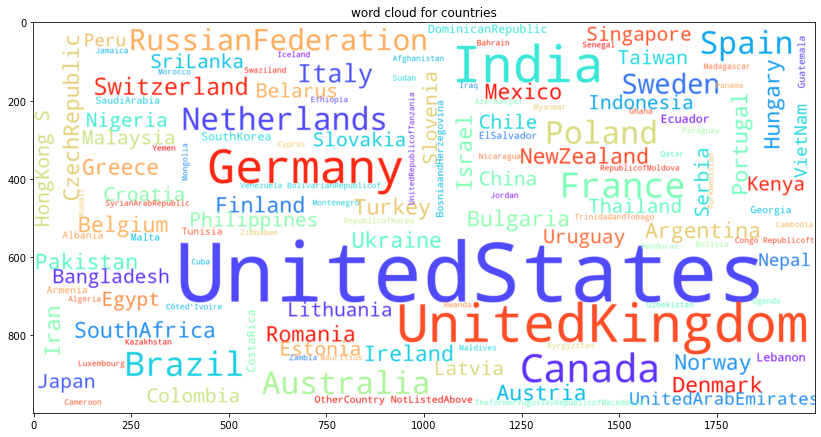

In [179]:
from wordcloud import WordCloud,STOPWORDS
wrds = df[df["Country"].notnull()]["Country"].str.replace(" ","")
wc = WordCloud(background_color="white",colormap="rainbow",scale=5).generate(" ".join(wrds))
plt.figure(figsize=(14,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("on")
plt.title("word cloud for countries")
plt.show()

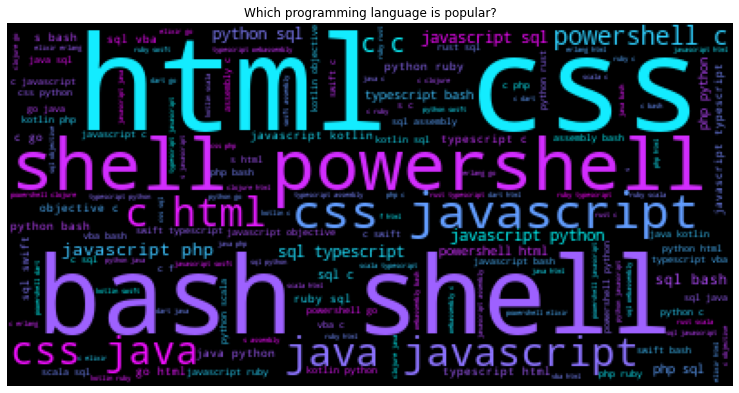

In [180]:
text = " ".join((df['LanguageWorkedWith']).astype(str)).lower()
wc = WordCloud(max_words=1200, stopwords=STOPWORDS, colormap='cool', background_color='Black').generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Which programming language is popular?');

### Social Media

## Model

### Label encoder

In [181]:
from sklearn import preprocessing
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MainBranch Hobbyist OpenSourcer  \
Respondent                                        
3           Semi_Developer      Yes          No   
4                Developer       No          No   
9                Developer      Yes         Yes   
13               Developer      Yes         Yes   
14               Developer      Yes          No   

                                                   OpenSource Employment  \
Respondent                                                                 
3           The quality of OSS and closed source software ...  Full-time   
4           The quality of OSS and closed source software ...  Full-time   
9           The quality of OSS and closed source software ...  Full-time   
13          OSS is, on average, of HIGHER quality than pro...  Full-time   
14          The quality of OSS and closed source software ...  Full-time   

                  Country Student   EdLevel  \
Respondent                                    
3                Thailand      No  Bachelor   
4           United States      No  Bachelor   
9             New Zealand      No     Lower   
13          United States      No    Master   
14                Germany      No       Phd   

                                               UndergradMajor  \
Respondent                                                      
3                               Web development or web design   
4           Computer science, computer engineering, or sof...   
9           Computer science, computer engineering, or sof...   
13          Computer science, computer engineering, or sof...   
14          Computer science, computer engineering, or sof...   

                                                     EduOther  \
Respondent                                                      
3           Taught yourself a new language, framework, or ...   
4           Taken an online course in programming or softw...   
9           Taken an online course in programming or softw...   
13          Taken an online course in programming or softw...   
14          Completed an industry certification program (e...   

                         OrgSize  \
Respondent                         
3           100 to 499 employees   
4           100 to 499 employees   
9             10 to 19 employees   
13            10 to 19 employees   
14          100 to 499 employees   

                                                      DevType YearsCode  \
Respondent                                                                
3           Designer;Developer, back-end;Developer, front-...         3   
4                                       Developer, full-stack         3   
9           Database administrator;Developer, back-end;Dev...        12   
13          Data or business analyst;Database administrato...        17   
14              Developer, desktop or enterprise applications        13   

           Age1stCode      YearsCodePro           CareerSat     JobSat  \
Respondent                                                               
3                  22                 1  Slightly satisfied  Satisfied   
4                  16  Less than 1 year      Very satisfied  Satisfied   
9                  11                 4  Slightly satisfied  Satisfied   
13                 11                 8      Very satisfied  Satisfied   
14                 16                 2      Very satisfied  Satisfied   

           CurrencySymbol          CurrencyDesc CompFreq  \
Respondent                                                 
3                     THB             Thai baht  Monthly   
4                     USD  United States dollar   Yearly   
9                     NZD    New Zealand dollar   Yearly   
13                    USD  United States dollar   Yearly   
14                    EUR         European Euro  Monthly   

                                           LanguageWorkedWith  \
Respondent                                                      
3                                 

In [182]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

MainBranch  Hobbyist  OpenSourcer  OpenSource  Employment  \
Respondent                                                              
3                    1         1            0           2           1   
4                    0         0            0           2           1   
9                    0         1            1           2           1   
13                   0         1            1           0           1   
14                   0         1            0           2           1   

            Country  Student  EdLevel  UndergradMajor  EduOther  OrgSize  \
Respondent                                                                 
3               136        0        0              11       453        3   
4               149        0        0               6       377        3   
9                96        0        1               6       344        1   
13              149        0        2               6       384        1   
14               49        0        3               6        22        3   

            DevType  YearsCode  Age1stCode  YearsCodePro  CareerSat  JobSat  \
Respondent                                                                    
3              5030         22          12             0          2       2   
4              7367         22           6            49          4       2   
9              4337          3           1            33          2       2   
13             2072          8           1            47          4       2   
14             6890          4           6            11          4       2   

            CurrencySymbol  CurrencyDesc  CompFreq  LanguageWorkedWith  \
Respondent                                                               
3                      102           108         0               10620   
4                      112           116         2                9007   
9                       82            78         2                2006   
13                     112           116         2                6053   
14                      34            36         0                7716   

            DevEnviron  OpSys  ITperson  SocialMedia  Gender  
Respondent                                                    
3                 4536      1         3            5       1  
4                 3156      3         2            5       1  
9                 4534      2         2            7       1  
13                4539      3         3            7       1  
14                4542      3         3            5       1

In [67]:
# concat df_categorical with original df
df_copy = df.copy()
df_copy = df_copy.drop(df_categorical.columns, axis=1)

df_copy = pd.concat([df_copy, df_categorical], axis=1)
df_copy.head()

CompTotal  ConvertedComp  WorkWeekHrs  Age  MainBranch  Hobbyist  \
Respondent                                                                     
3             23000.0         8820.0         40.0   28           0         1   
4             61000.0        61000.0         80.0   22           0         0   
9            138000.0        95179.0         32.0   23           0         1   
13            90000.0        90000.0         40.0   28           0         1   
14             4150.0        57060.0         40.0   31           0         1   

            OpenSourcer  OpenSource  Employment  Country  Student  EdLevel  \
Respondent                                                                   
3                     0           2           1      136        0        0   
4                     0           2           1      149        0        0   
9                     1           2           1       96        0        1   
13                    1           0           1      149        0        2   
14                    0           2           1       49        0        3   

            UndergradMajor  EduOther  OrgSize  DevType  YearsCode  Age1stCode  \
Respondent                                                                      
3                       11       453        3     5030         22          12   
4                        6       377        3     7367         22           6   
9                        6       344        1     4337          3           1   
13                       6       384        1     2072          8           1   
14                       6        22        3     6890          4           6   

            YearsCodePro  CareerSat  JobSat  CurrencySymbol  CurrencyDesc  \
Respondent                                                                  
3                      0          2       2             102           108   
4                     49          4       2             112           116   
9                     33          2       2              82            78   
13                    47          4       2             112           116   
14                    11          4       2              34            36   

            CompFreq  LanguageWorkedWith  DevEnviron  OpSys  ITperson  \
Respondent                                                              
3                  0               10620        4536      1         3   
4                  2                9007        3156      3         2   
9                  2                2006        4534      2         2   
13                 2                6053        4539      3         3   
14                 0                7716        4542      3         3   

            SocialMedia  Gender  
Respondent                       
3                     5       1  
4                     5       1  
9                     7       1  
13                    7       1  
14                    5       1

### Splitting the dataset into Train and Test sets¶

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Putting feature variable to X
X = df_copy.drop('ConvertedComp',axis=1)

# Putting response variable to y
y = df_copy['ConvertedComp']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30786, 29) (13195, 29) (30786,) (13195,)


### Building the Model

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [74]:
pipelines = {
     'rf':make_pipeline(RandomForestRegressor(random_state=101)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=101)),
    'ridge':make_pipeline(Ridge(random_state=101)),
    'lasso':make_pipeline(Lasso(random_state=101)),
    'enet':make_pipeline(ElasticNet(random_state=101)),
}

In [75]:
hypergrid = {
#     'rf': {
#         'randomforestregressor__min_samples_split':[2,4,6],
#         'randomforestregressor__min_samples_leaf':[1,2,3]
#     },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [77]:
# cross-validation generator cv
# n_jobsint, default=None Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for gb.
gb has been successfully fit.
Starting training for ridge.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00036e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00036e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00036e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00036e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:21

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.50018e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00018e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.00004e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00036e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:21

ridge has been successfully fit.
Starting training for lasso.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+15, tolerance: 2.327e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+15, tolerance: 2.311e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+15, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+15, tolerance: 2.364e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+15, tolerance: 2.369e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+15, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+15, tolerance: 2.311e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+15, tolerance: 2.345e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+15, toleranc

lasso has been successfully fit.
Starting training for enet.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+15, tolerance: 2.311e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+15, tolerance: 2.295e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+15, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+15, tolerance: 2.369e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+15, tolerance: 2.327e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+15, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+15, tolerance: 2.295e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+15, tolerance: 2.309e+11
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+15, toleranc

enet has been successfully fit.


### Evaluating the Model

In [91]:
from sklearn import metrics

In [80]:
predictions_1 = fit_models['ridge'].predict(X_test)
print('By using ridge')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))
print("R^2:", metrics.r2_score(y_test, predictions_1))

By using ridge
MAE: 134064.05099221188
MSE: 74369125301.08328
RMSE: 272707.0319978626
R^2: 0.06919213676190106


In [82]:
predictions_3 = fit_models['lasso'].predict(X_test)
print('By using lasso')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_3))
print('MSE:', metrics.mean_squared_error(y_test, predictions_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_3)))
print("R^2:", metrics.r2_score(y_test, predictions_3))

By using lasso
MAE: 134064.14153736277
MSE: 74369131339.27449
RMSE: 272707.0430687013
R^2: 0.06919206118758414


In [201]:
predictions_4 = fit_models['enet'].predict(X_test)
print('By using ElasticNet')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_4))
print('MSE:', metrics.mean_squared_error(y_test, predictions_4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_4)))
print("R^2:", metrics.r2_score(y_test, predictions_4))

By using ElasticNet
MAE: 133938.93670323066
MSE: 74364091804.29224
RMSE: 272697.8030793285
R^2: 0.06925513627108881


### Best Model for our DataSet
#### Gradient Boosting Regressor

In [81]:
predictions_2 = fit_models['gb'].predict(X_test)
print('By using gb')
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))
print("R^2:", metrics.r2_score(y_test, predictions_2))

By using gb
MAE: 42857.47810799603
MSE: 10844006623.163416
RMSE: 104134.56017654954
R^2: 0.8642758457493986


### Predictions vs. Real Values

In [87]:
predictions = fit_models['gb'].predict(X_test)
predictions

array([  90769.25824142,   19500.10633939,  106954.22647876, ...,
         65831.96376858, 1932120.51072994,   54544.85080586])

In [88]:
Real_Values = np.array(y_test)
Real_Values

array([  95000.,    3600.,   47664., ...,   50000., 2000000.,   35518.])

In [94]:
compare_df = pd.DataFrame()
compare_df['Actual_Salary'] = y_test
compare_df['Predict_Salary'] = predictions
compare_df['Age'] = X['Age']
compare_df.head()

Actual_Salary  Predict_Salary  Age
Respondent                                    
31744             95000.0    90769.258241   35
81334              3600.0    19500.106339   30
13538             47664.0   106954.226479   29
40042              4068.0    67236.787693   25
82721             45000.0    66190.583305   23

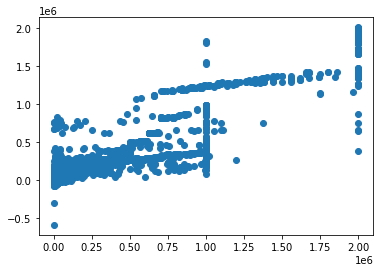

In [96]:
plt.scatter(Real_Values,predictions);

### Residual Histogram

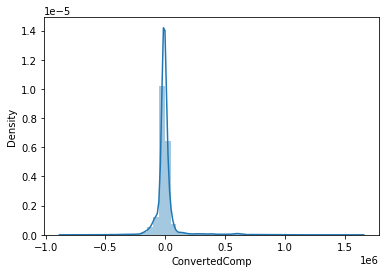

In [97]:
sns.distplot((y_test-predictions),bins=50);

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
model = GridSearchCV(pipelines['gb'], hypergrid['gb'], cv=10, n_jobs=-1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__alpha': [0.001, 0.005,
                                                              0.01, 0.05, 0.1,
                                                              0.5, 0.99]})

In [85]:
predictions5 = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions5))
print('MSE:', metrics.mean_squared_error(y_test, predictions5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions5)))
print("R^2:", metrics.r2_score(y_test, predictions5))

MAE: 133938.93670323066
MSE: 74364091804.29224
RMSE: 272697.8030793285
R^2: 0.06925513627108881


# Future Work

# Thank You
## Questions